# Time Series Classification Part 1

In this notebook, we will try to forecast the 100 next values of the "OT" variable for ETTh1 dataset.


To achieve this, we will train a predictor to accurately predict the next 100 values.

## Dataset description 

First of all, let's look at the given ETTh1 dataset

In [94]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [95]:
# Loading the ETTh1 dataset
df = pd.read_csv("/kaggle/input/time-series-classification-part-1/ETTh1_without_missing.csv")
df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)
df = df.drop(["Id", "Unnamed: 3"], axis=1)
df

,OT
date,
2016-07-01 00:00:00,30.531000
2016-07-01 01:00:00,27.787001
2016-07-01 02:00:00,27.787001
2016-07-01 03:00:00,25.044001
2016-07-01 04:00:00,21.948000
...,...
2018-06-22 11:00:00,6.753000
2018-06-22 12:00:00,3.658000
2018-06-22 13:00:00,3.658000


In [96]:
df.shape

(17320, 1)

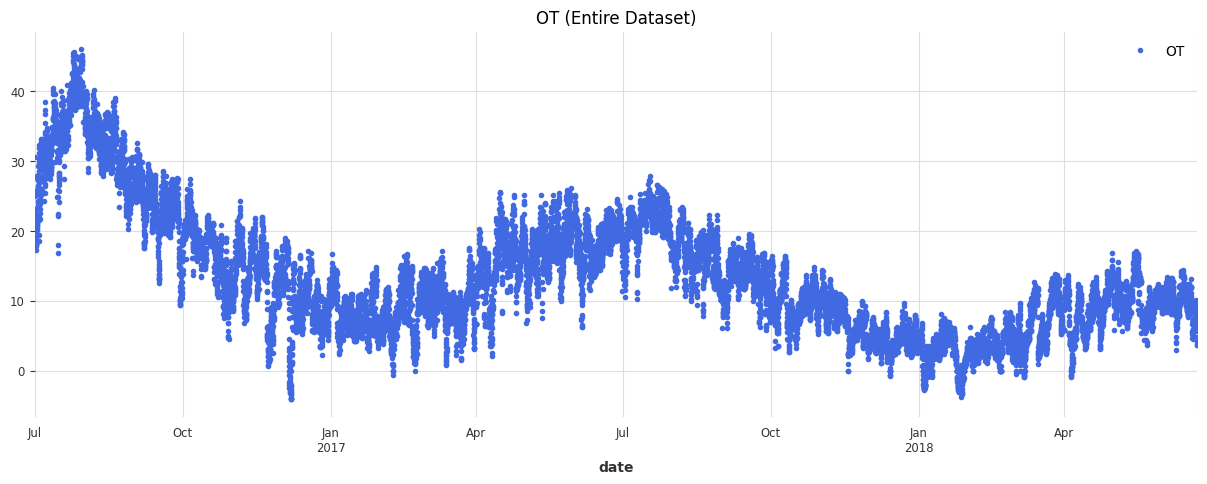

In [97]:
# Plotting the entire dataset
df.plot(style='.',
        figsize=(15, 5),
        color='royalblue',
        title='OT (Entire Dataset)')
plt.show()

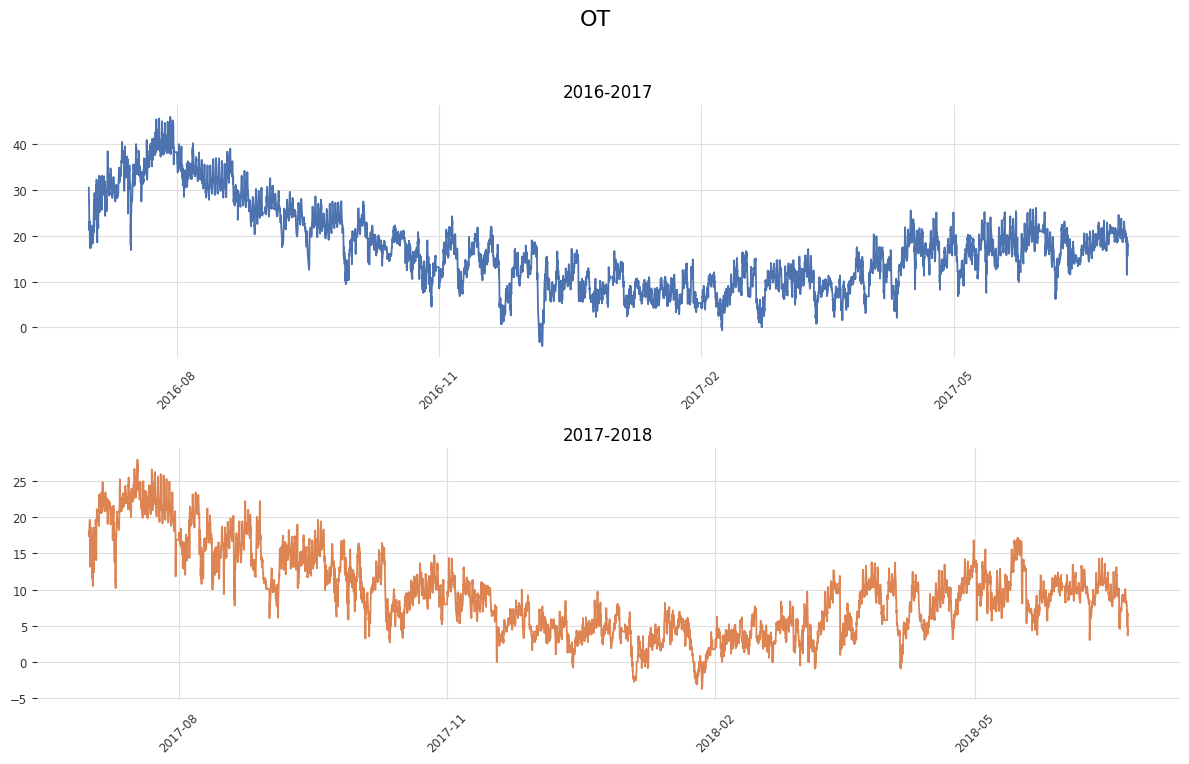

In [98]:
# Plotting 2 graphs, one for each year of energy consumption 06/2016-06/2018

year_one = df.loc[(df.index >= '2016-07-01 00:00:00') & (df.index <= '2017-07-01 00:00:00')]
year_two = df.loc[(df.index >= '2017-07-01 00:00:00') & (df.index <= '2018-07-01 00:00:00')]
years = [year_one, year_two]
year_labels = ['2016-2017', '2017-2018']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
fig.suptitle('OT', fontsize=16)

axes = axes.flatten()

colors = sns.color_palette('deep', 4)

for i, year in enumerate(years):
    axes[i].plot(year.index, year['OT'], color=colors[i])
    axes[i].set_title(year_labels[i])
    axes[i].set
    
    axes[i].xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Setting x axis tick marks/intervals
    
    axes[i].tick_params(axis='x', rotation=45)  # rotate x-axis labels for better readability

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
plt.show()

We can see that the two years maintain approximately the same pattern. 

The "OT" temperatures were much highter in 2016 than in 2017. 

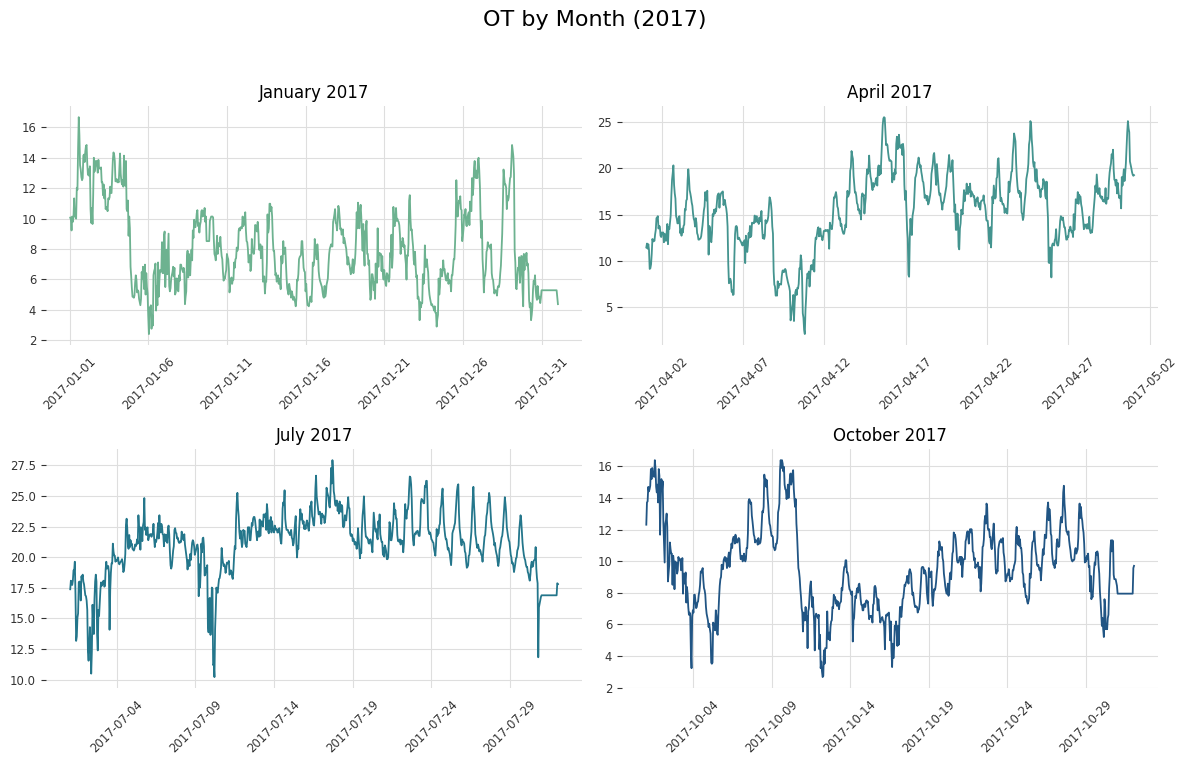

In [99]:
# Plotting 4 graphs, one for each month of energy consumption for each season 
# We'll plot January, April, July, and October for Winter, Spring, Summer, Fall Respectively 
month_one = df.loc[(df.index >= '2017-01-01 01:00:00') & (df.index <= '2017-02-01 01:00:00')]
month_two = df.loc[(df.index >= '2017-04-01 01:00:00') & (df.index <= '2017-05-01 01:00:00')]
month_three = df.loc[(df.index >= '2017-07-01 01:00:00') & (df.index <= '2017-08-01 01:00:00')]
month_four = df.loc[(df.index >= '2017-10-01 01:00:00') & (df.index <= '2017-11-01 01:00:00')]
months = [month_one, month_two, month_three, month_four]
month_labels = ['January 2017', 'April 2017', 'July 2017', 'October 2017']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('OT by Month (2017)', fontsize=16)

axes = axes.flatten()

colors = sns.color_palette('crest', 4)

for i, month in enumerate(months):
    axes[i].plot(month.index, month['OT'], color = colors[i])
    axes[i].set_title(month_labels[i])
    
    axes[i].xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Setting x axis tick marks/intervals
    
    axes[i].tick_params(axis='x', rotation=45)  # rotate x-axis labels
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
plt.show()

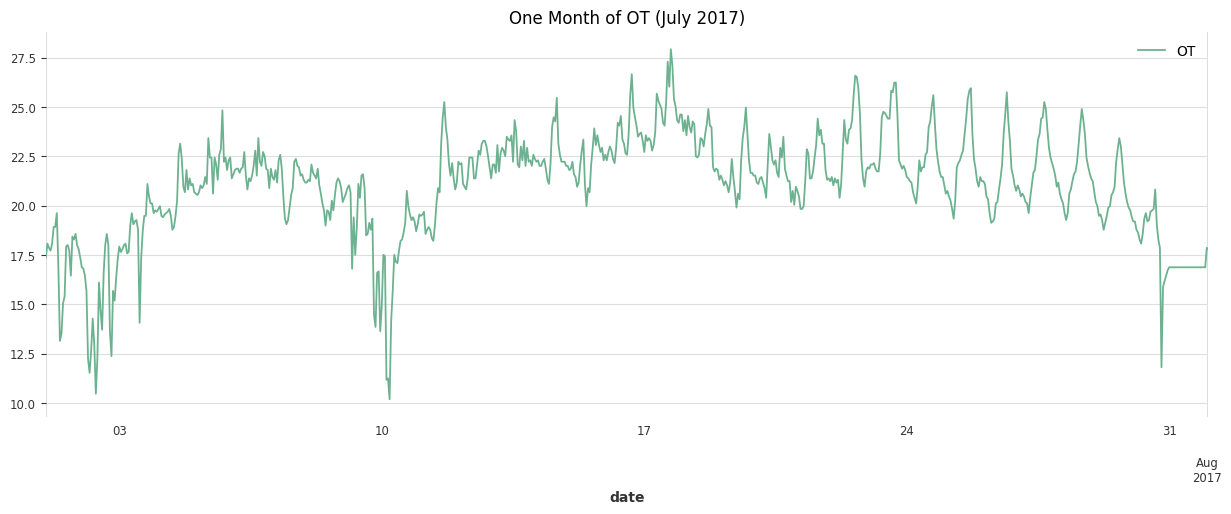

In [100]:
# Taking a closer look at one month
month_three.plot(figsize=(15, 5),
              title="One Month of OT (July 2017)",
              color=colors[0])
plt.show()

Months do not appear to resemble one another in overall structure. OT values appears to align more on a dayly/hourly basis.

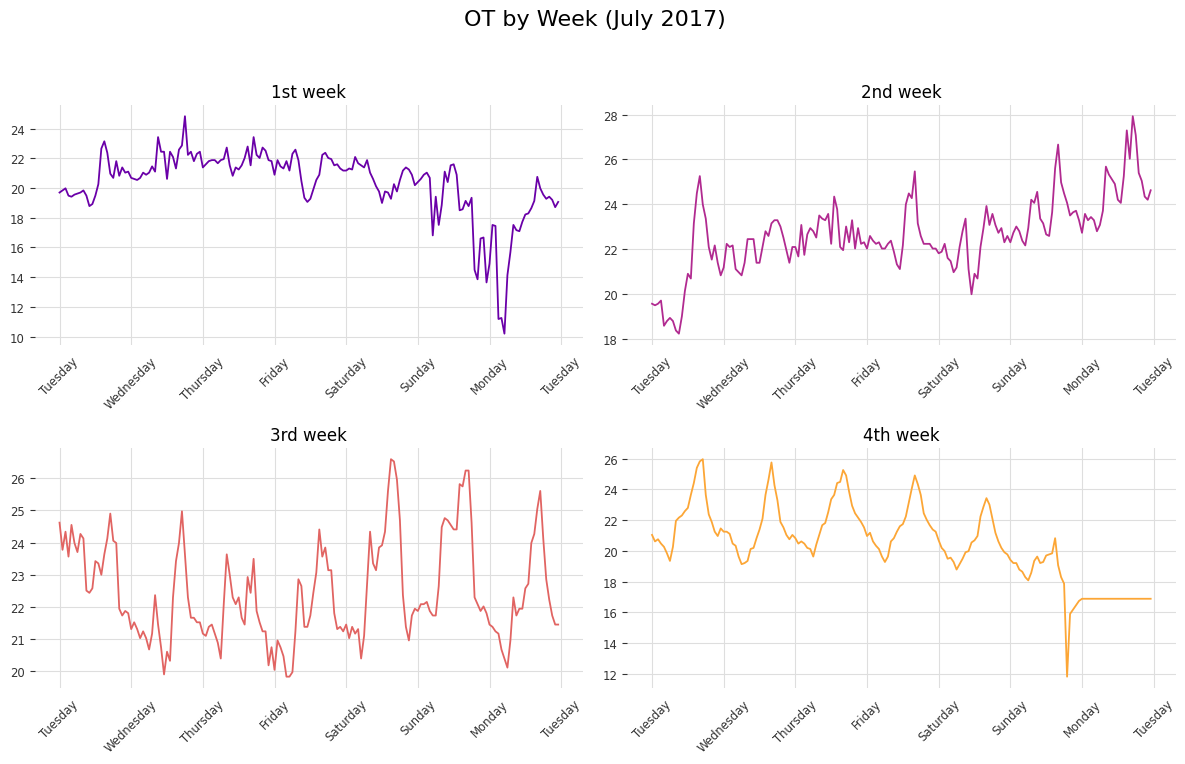

In [101]:
# Plotting 4 graphs, one for each week of energy consumption July 2017
# Starting on July 4th as its a Sunday
# Plotting Sunday - Saturday for each week
week_one = df.loc[(df.index >= '2017-07-04 00:00:00') & (df.index < '2017-07-11 00:00:00')]
week_two = df.loc[(df.index >= '2017-07-11 00:00:00') & (df.index < '2017-07-18 00:00:00')]
week_three = df.loc[(df.index >= '2017-07-18 00:00:00') & (df.index < '2017-07-25 00:00:00')]
week_four = df.loc[(df.index >= '2017-07-25 00:00:00') & (df.index < '2017-08-1 00:00:00')]

weeks = [week_one, week_two, week_three, week_four]
week_labels = ['1st week', '2nd week', '3rd week', '4th week']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('OT by Week (July 2017)', fontsize=16)

axes = axes.flatten()

colors = sns.color_palette('plasma', 4)

for i, week in enumerate(weeks):
    axes[i].plot(week.index, week['OT'], color = colors[i])
    axes[i].set_title(week_labels[i])
    
    axes[i].xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Setting x axis tick marks/intervals
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%A')) # Format x axis to say day names
        
    axes[i].tick_params(axis='x', rotation=45)  # rotate x-axis labels
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
plt.show()

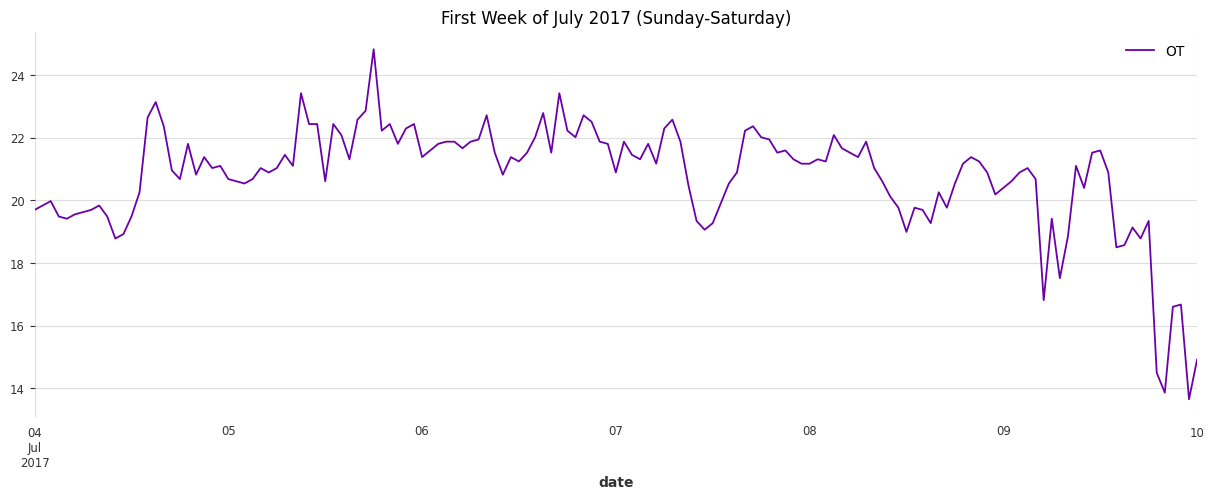

In [102]:
# Looking closer at the first week in july
one_week = df.loc[(df.index >= '2017-07-04') & (df.index <= '2017-07-10')]

# Plotting one week of data
ax = one_week.plot(figsize=(15, 5),
              title="First Week of July 2017 (Sunday-Saturday)",
              color=colors[0])


plt.show()

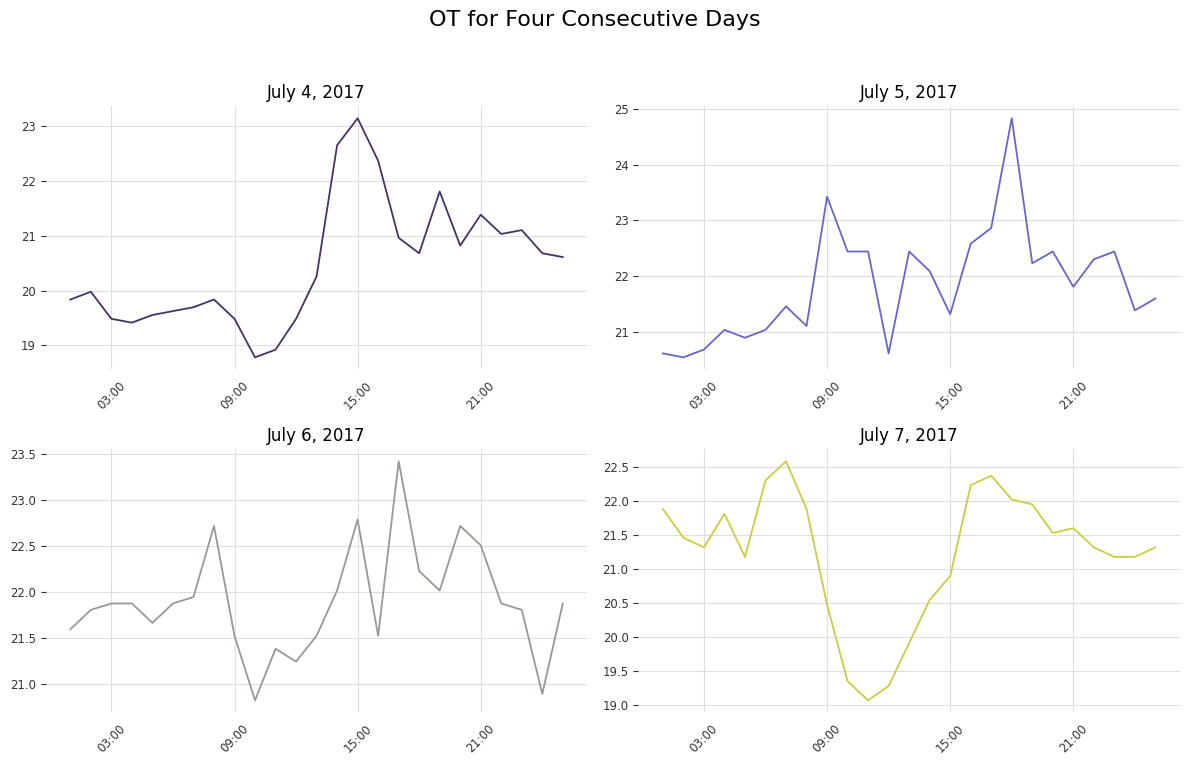

In [103]:
# Pulling out one day of data
day_one = df.loc[(df.index >= '2017-07-04 01:00:00') & (df.index <= '2017-07-05 01:00:00')]
day_two = df.loc[(df.index >= '2017-07-05 01:00:00') & (df.index <= '2017-07-06 01:00:00')]
day_three = df.loc[(df.index >= '2017-07-06 01:00:00') & (df.index <= '2017-07-07 01:00:00')]
day_four = df.loc[(df.index >= '2017-07-07 01:00:00') & (df.index <= '2017-07-08 01:00:00')]
days = [day_one, day_two, day_three, day_four]
day_labels = ['July 4, 2017', 'July 5, 2017', 'July 6, 2017', 'July 7, 2017']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('OT for Four Consecutive Days', fontsize=16)

axes = axes.flatten()

colors = sns.color_palette('gist_stern', 4)

for i, day in enumerate(days):
    axes[i].plot(day.index, day['OT'], color=colors[i])
    axes[i].set_title(day_labels[i])
    
    axes[i].xaxis.set_major_locator(mdates.HourLocator(interval=6))  # Setting x axis tick marks/intervals
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Show hours and minutes
    
    
    axes[i].tick_params(axis='x', rotation=45)  # Optionally rotate x-axis labels for better readability

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
plt.show()


## Choosing our model for the time series forecasting


To predict the next 100 values of "OT", we need to choose a forecasting model.


Let's compare the mae of 4 models from darts.

In [104]:
!pip install darts

In [113]:
import torch
import pandas as pd

from darts import TimeSeries
from darts.models import TFTModel, NBEATSModel, TiDEModel
from darts.dataprocessing.transformers.scaler import Scaler
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from darts.metrics import mae, mse

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

## Splitting data into train / test sets

In [115]:
series = TimeSeries.from_dataframe(df)
train, temp = series.split_after(0.8)
val, test = temp.split_after(0.9)

<Axes: xlabel='date'>

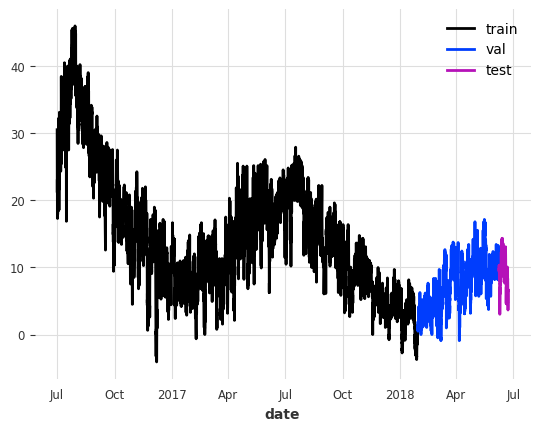

In [116]:
train.plot(label="train")
val.plot(label="val")
test.plot(label="test")

In [117]:
scaler = Scaler()  # default uses sklearn's MinMaxScaler
series_scaled = scaler.fit_transform(series)
train = scaler.fit_transform(train)
val = scaler.transform(val)
test = scaler.transform(test)

## Models Configuration

We will choose between 4 models : 
- TFTModel
- NBEATSModel
- TiDEModel
- TiDE+RinModel

In [ ]:
optimizer_kwargs = {
    "lr": 1e-3,
}

# PyTorch Lightning Trainer arguments
pl_trainer_kwargs = {
    "gradient_clip_val": 1,
    "max_epochs": 5,
    "accelerator": "auto",
    "callbacks": [],
}

# learning rate scheduler
lr_scheduler_cls = torch.optim.lr_scheduler.ExponentialLR
lr_scheduler_kwargs = {
    "gamma": 0.999,
}

# early stopping
# this setting stops training once the the validation loss has not decreased by more than 1e-3 for 10 epochs
early_stopping_args = {
    "monitor": "val_loss",
    "patience": 2,
    "min_delta": 1e-3,
    "mode": "min",
}

#
common_model_args = {
    "input_chunk_length": 12,  # lookback window
    "output_chunk_length": 12,  # forecast/lookahead window
    "optimizer_kwargs": optimizer_kwargs,
    "pl_trainer_kwargs": pl_trainer_kwargs,
    "lr_scheduler_cls": lr_scheduler_cls,
    "lr_scheduler_kwargs": lr_scheduler_kwargs,
    "likelihood": None,  # use a likelihood for probabilistic forecasts
    "save_checkpoints": True,  # checkpoint to retrieve the best performing model state,
    "force_reset": True,
    "batch_size": 512,
    "random_state": 42,
}

In [118]:
# create the models
model_tft = TFTModel(
    **common_model_args, add_relative_index=True,model_name="tft"
)

model_nbeats = NBEATSModel(
    **common_model_args, model_name="nbeats"
)

model_tide = TiDEModel(
    **common_model_args, use_reversible_instance_norm=False, model_name="tide0"
)

model_tide_rin = TiDEModel(
    **common_model_args, use_reversible_instance_norm=True, model_name="tide1"
)

models = {
    "TFT": model_tft,
    "NBEATS": model_nbeats,
    "TiDE": model_tide,
    "TiDE+RIN": model_tide_rin,
}

In [119]:
# train the models and load the model from its best state/checkpoint
for name, model in models.items():

    # early stopping needs to get reset for each model
    pl_trainer_kwargs["callbacks"] = [
        EarlyStopping(
            **early_stopping_args,
        )
    ]

    model.fit(
        series=train,
        val_series=val,
        verbose=True,
    )
    # load from checkpoint returns a new model object, stored in the models dict
    models[name] = model.load_from_checkpoint(model_name=model.model_name, best=True)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

## Models Prediction

We will choose the model that predict with the lower mae

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

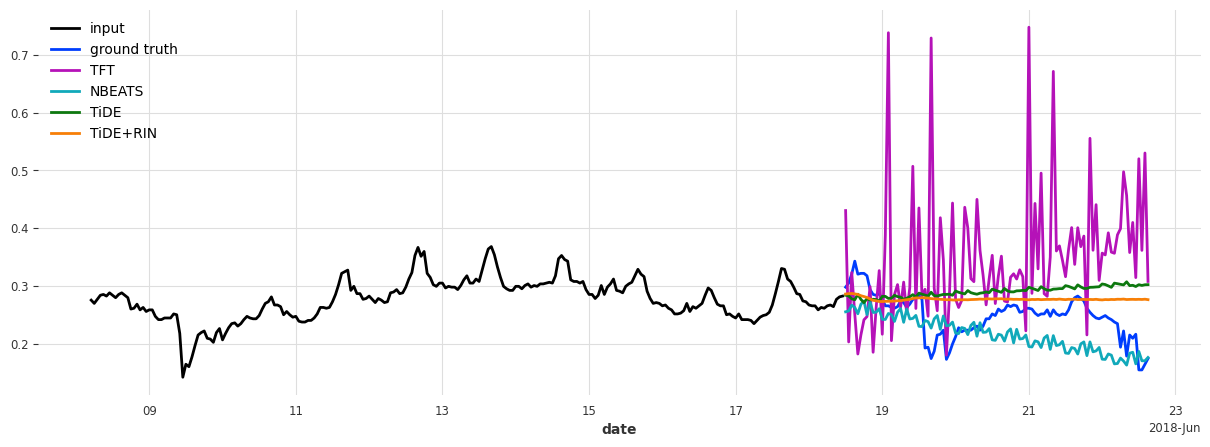

In [122]:
# predict the next `pred_steps` points after the end of `pred_input`
pred_steps = 100
pred_input = test[:-pred_steps]

fig, ax = plt.subplots(figsize=(15, 5))
pred_input.plot(label="input")
test[-pred_steps:].plot(label="ground truth", ax=ax)

result_accumulator = {}
# predict with each model and compute/store the metrics against the test sets
for model_name, model in models.items():
    pred_series = model.predict(n=pred_steps, series=pred_input)
    pred_series.plot(label=model_name, ax=ax)

    result_accumulator[model_name] = {
        "mae": mae(test, pred_series),
        "mse": mse(test, pred_series),
    }

## Models Result

<Axes: >

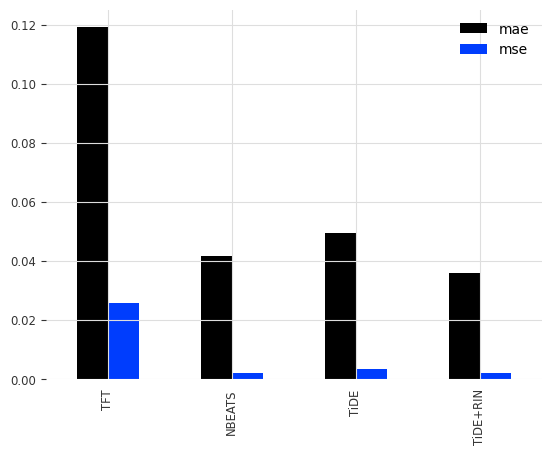

In [123]:
results_df = pd.DataFrame.from_dict(result_accumulator, orient="index")
results_df.plot.bar()

The model with the lower mae is TiDE+RIN.

We will use it to predict the 100 next values of "OT", but first let's change some hyperparameters to have better result.

### TiDE Final Model Configuration

Before working with TiDE+RIN, we used TiDE alone. The best mae we got was 0.6344992152. 

In [ ]:
tide = TiDEModel(
    input_chunk_length=512, 
    output_chunk_length=100,
    num_encoder_layers=2,
    num_decoder_layers=2,
    decoder_output_dim=32,
    hidden_size=512,
    temporal_decoder_hidden=16,
    use_layer_norm=True,
    dropout=0.5,
    random_state=42
)

With the random_state=42, we always get 0.6344992152. It helped us find the best hyperparameters.

### TiDE Final Model Prediction

In [ ]:
tide.fit(
    series=series_scaled,
    epochs=5,
    verbose=True,
)

In [ ]:
scaled_pred_tide = tide.predict(n=100)
pred_tide = scaler.inverse_transform(scaled_pred_tide)

pred_tide is our 100 predict values with TiDE.

## TiDE+RIN Final Model Configuration

In [ ]:
models = {
    "TiDE+RIN": model_tide_rin,
}

optimizer_kwargs = {
    "lr": 1e-3,
}

# PyTorch Lightning Trainer arguments
pl_trainer_kwargs = {
    "gradient_clip_val": 1,
    "max_epochs": 5,
    "accelerator": "auto",
    "callbacks": [],
}

# learning rate scheduler
lr_scheduler_cls = torch.optim.lr_scheduler.ExponentialLR
lr_scheduler_kwargs = {
    "gamma": 0.999,
}

# early stopping
# this setting stops training once the the validation loss has not decreased by more than 1e-3 for 10 epochs
early_stopping_args = {
    "monitor": "val_loss",
    "patience": 2,
    "min_delta": 1e-3,
    "mode": "min",
}

#
common_model_args = {
    "input_chunk_length": 512,  # lookback window
    "output_chunk_length": 100,  # forecast/lookahead window
    "optimizer_kwargs": optimizer_kwargs,
    "pl_trainer_kwargs": pl_trainer_kwargs,
    "lr_scheduler_cls": lr_scheduler_cls,
    "lr_scheduler_kwargs": lr_scheduler_kwargs,
    "likelihood": None,  # use a likelihood for probabilistic forecasts
    "save_checkpoints": True,  # checkpoint to retrieve the best performing model state,
    "force_reset": True,
    "hidden_size": 512,
    "num_encoder_layers": 2,
    "num_decoder_layers": 2,
    "decoder_output_dim": 32,
    "temporal_decoder_hidden": 16,
    "dropout": 0.5,
}

In [ ]:
# train the models and load the model from its best state/checkpoint
for name, model in models.items():

    # early stopping needs to get reset for each model
    pl_trainer_kwargs["callbacks"] = [
        EarlyStopping(
            **early_stopping_args,
        )
    ]

    model.fit(
        series=train,
        val_series=val,
        verbose=True,
    )
    # load from checkpoint returns a new model object, stored in the models dict
    models[name] = model.load_from_checkpoint(model_name=model.model_name, best=True)

In [ ]:
# predict the next `pred_steps` points after the end of `pred_input`
pred_steps = 100
pred_input = series_scaled

# predict with each model and compute/store the metrics against the test sets
for model_name, model in models.items():
    pred_series = model.predict(n=pred_steps, series=pred_input)

## Final Result

In [ ]:
result = scaler.inverse_transform(pred_series)
result = result.pd_dataframe()
result = result.reset_index(drop=True)
result['Id'] = range(100)
result

In [ ]:
result.to_csv('predictions.csv', index=False)

We save our result in a csv that we submit to the competition


Best result so far : mae = 0.6177714877